In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/")
!ls

GitStuff  ProyectoML  Semana1  Semana3	Semana5  Semana7  Semana9
Parcial2  README.md   Semana2  Semana4	Semana6  Semana8


In [108]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana9/Data/MinimosCuadratico.txt'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana9/Data/MinimosCuadratico.txt'

In [109]:
data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']
data

,x,y
0,0.526316,10.77900
1,1.052632,13.12721
2,1.578947,21.20879
3,2.105263,20.63223
4,2.631579,34.11089
5,3.157895,60.66644
6,3.684211,55.07888
7,4.210526,81.89598
8,4.736842,96.83438
9,5.263158,117.55490


In [110]:
x = np.array(data['x'])
y = np.array(data['y'])

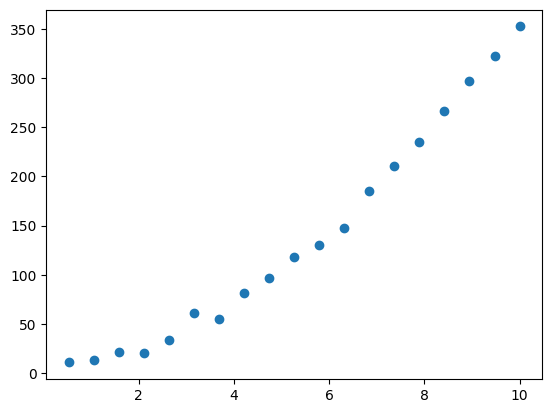

In [111]:
plt.scatter(x,y)

In [112]:
def GetFit(x,y,n=2):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  # Ajuste
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol

In [121]:
n=2
xsol = GetFit(x,y,n=n)
xsol

array([3.91439388, 5.04229284, 3.04171871])

In [122]:
def GetModel(x,p):

  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [123]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,xsol)

In [124]:
import sympy as sym
X = sym.Symbol('x')
GetModel(X,xsol)

3.04171870549847*x**2 + 5.04229284016467*x + 3.91439387638529

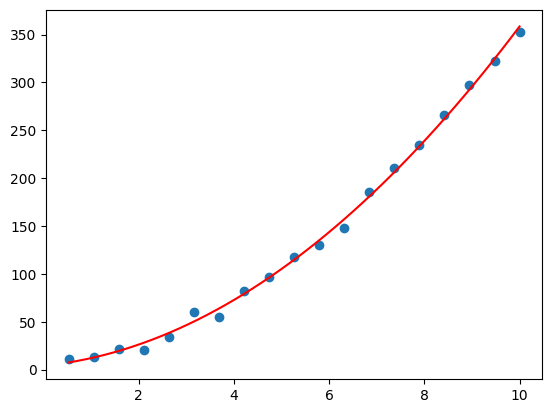

In [125]:
plt.scatter(x,y)
plt.plot(_x,_y,color='r')

In [126]:
def GetError(x,y,p):

  l = x.shape[0]

  n = len(p)-1
  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  R = y - np.dot(A,p)
  sigma2 = np.dot( R.T , R )/(l-len(p))

  CVar = sigma2*np.linalg.inv(np.dot(A.T,A))

  return CVar

In [127]:
Cov  =GetError(x,y,xsol)
Cov

array([[19.16292161, -7.46045096,  0.60576312],
       [-7.46045096,  3.66746294, -0.32884283],
       [ 0.60576312, -0.32884283,  0.03124007]])

In [132]:
np.sqrt(Cov[2,2])

0.1767486043779693

In [133]:
xsol[2]

3.041718705498473